# ML Practice 1.2 (Wine) — Хайбулин Никита Сергеевич (гр. 955-М)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from IPython.display import display

np.random.seed(42)

sns.set(style="whitegrid")

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target
df["region"] = pd.Categorical.from_codes(wine.target, [f"Region_{i+1}" for i in range(3)])

print("✓ Данные загружены. Форма:", df.shape)
display(df.head(3))

df.info()

display(df[wine.feature_names].describe().round(2))

✓ Данные загружены. Форма: (178, 15)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,region
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,Region_1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,Region_1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,Region_1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    float64 
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    floa

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


## Визуальный анализ (чек-лист)

Сначала посмотрим:
- корреляции признаков (тепловая карта с аннотациями),
- несколько распределений по регионам.

Это поможет объяснить результаты заданий про мультиколлинеарность и асимметрию.


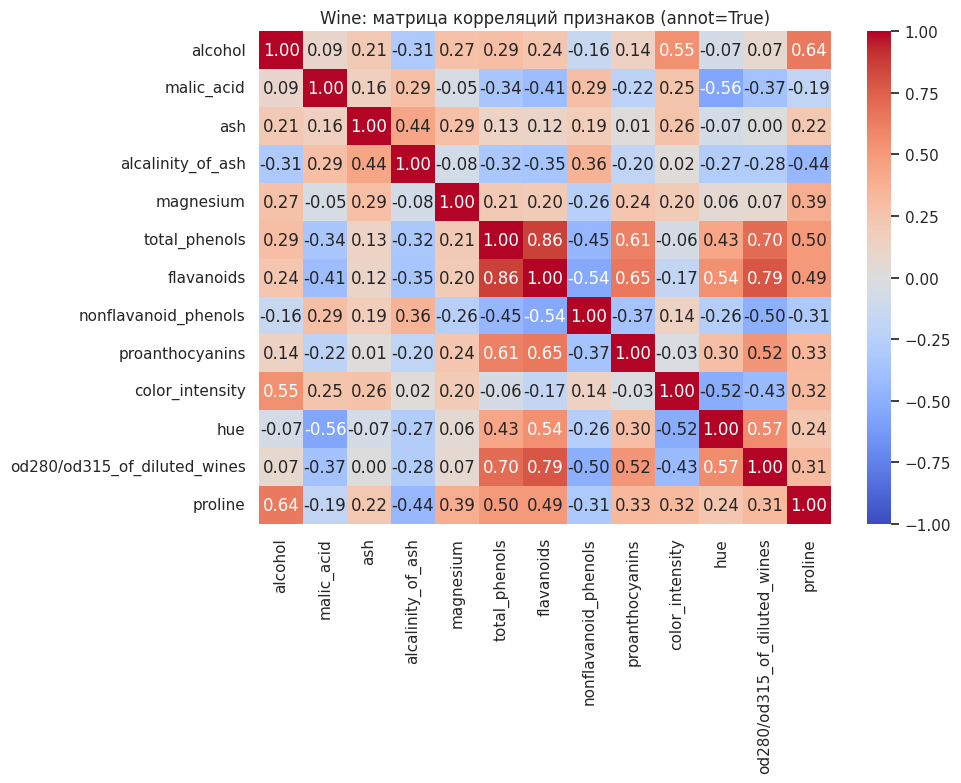

In [2]:
# Визуализация 1: корреляции
corr = df[wine.feature_names].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Wine: матрица корреляций признаков (annot=True)")
plt.tight_layout()
plt.show()


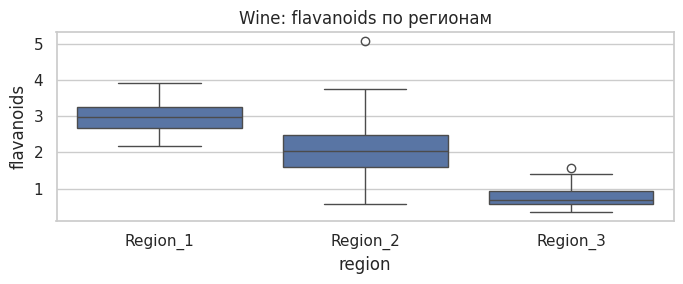

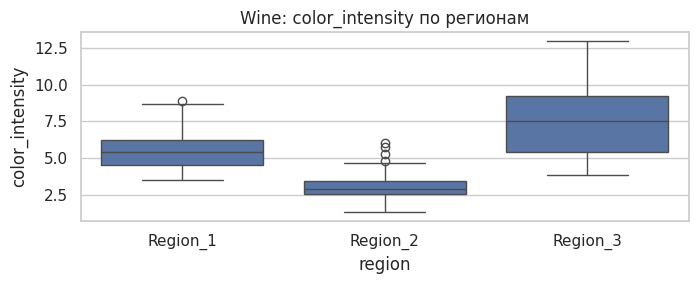

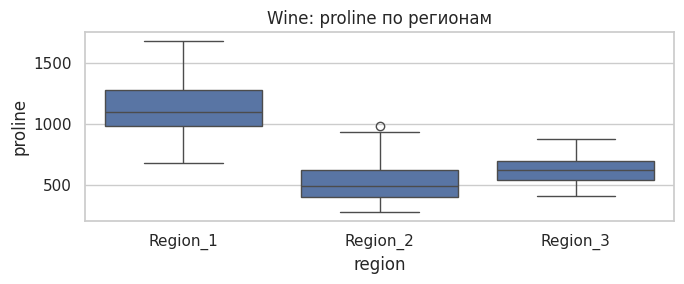

In [3]:
# Визуализация 2: несколько признаков по регионам
for col in ["flavanoids", "color_intensity", "proline"]:
    plt.figure(figsize=(7, 3))
    sns.boxplot(data=df, x="region", y=col)
    plt.title(f"Wine: {col} по регионам")
    plt.tight_layout()
    plt.show()


# Самостоятельные задания

## Задание 1. Выявление мультиколлинеарности
Нужно:
1) найти все пары признаков с |r| > 0.7;  
2) вывести таблицу: `Признак_1`, `Признак_2`, `Корреляция`;  
3) посчитать количество таких пар;  
4) определить признак, который чаще всего встречается в сильных корреляциях.

**Почему это важно:** сильная корреляция означает, что признаки частично дублируют информацию (мультиколлинеарность).


In [4]:
# - corr: матрица корреляций (13x13)
# - берём только верхний треугольник, чтобы не дублировать пары (A,B) и (B,A)
# - фильтруем по |r| > 0.7

import numpy as np

corr = df[wine.feature_names].corr()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

pairs = (
    upper.stack()
    .reset_index()
    .rename(columns={"level_0": "Признак_1", "level_1": "Признак_2", 0: "Корреляция"})
)

strong_pairs = pairs[pairs["Корреляция"].abs() > 0.7].copy()
strong_pairs["|r|"] = strong_pairs["Корреляция"].abs()
strong_pairs = strong_pairs.sort_values("|r|", ascending=False).drop(columns="|r|")

print(f"Количество пар с |r| > 0.7: {len(strong_pairs)}")
display(strong_pairs)

# Чаще всего участвует в сильных корреляциях
counts = pd.concat([strong_pairs["Признак_1"], strong_pairs["Признак_2"]]).value_counts()
print("Частота участия признаков в сильных корреляциях:")
display(counts)
print("Самый частый признак:", counts.index[0])


Количество пар с |r| > 0.7: 2


,Признак_1,Признак_2,Корреляция
50,total_phenols,flavanoids,0.864564
61,flavanoids,od280/od315_of_diluted_wines,0.787194


Частота участия признаков в сильных корреляциях:


,count
flavanoids,2
total_phenols,1
od280/od315_of_diluted_wines,1


Самый частый признак: flavanoids


- Если признак часто встречается в сильных корреляциях, он “связан” с другими и может быть кандидатом на удаление (или наоборот — оставить его, а удалить дублирующий).
- Для линейных моделей мультиколлинеарность ухудшает интерпретируемость коэффициентов.


## Задание 2. Асимметрия распределений (skewness)
Нужно:
1) рассчитать skewness **через `scipy.stats.skew()`** для каждого признака;  
2) найти 3 признака с наибольшей положительной асимметрией;  
3) объяснить, почему это важно для алгоритмов, чувствительных к распределению (например, SVM RBF).

Положительная асимметрия (skew > 0) означает: большинство значений слева, а справа длинный хвост.


Skewness для всех признаков (по убыванию):


,Признак,Skewness
4,magnesium,1.098191
1,malic_acid,1.039651
9,color_intensity,0.868585
12,proline,0.767822
8,proanthocyanins,0.517137
7,nonflavanoid_phenols,0.450151
3,alcalinity_of_ash,0.213047
5,total_phenols,0.086639
6,flavanoids,0.025344
10,hue,0.021091


Топ-3 по положительной асимметрии:


,Признак,Skewness
4,magnesium,1.098191
1,malic_acid,1.039651
9,color_intensity,0.868585


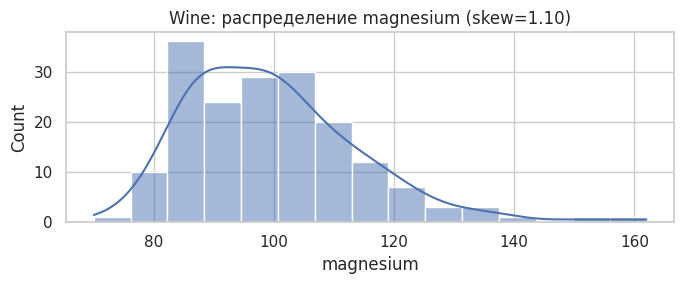

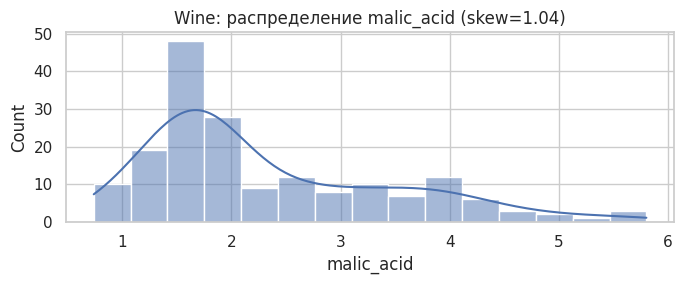

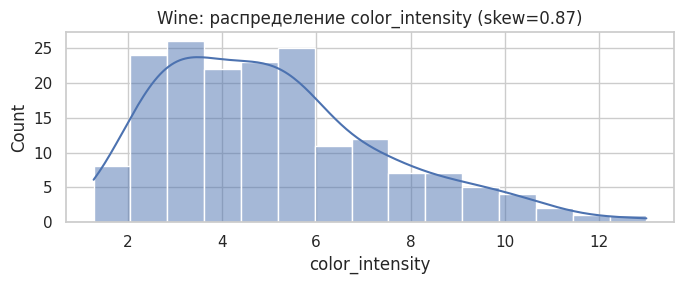

In [5]:
from scipy.stats import skew

skew_values = []
for col in wine.feature_names:
    # bias=False: оценка асимметрии с поправкой на смещение (ближе к "выборочной" оценке)
    skew_val = skew(df[col].values, bias=False)
    skew_values.append((col, skew_val))

skew_df = pd.DataFrame(skew_values, columns=["Признак", "Skewness"]).sort_values("Skewness", ascending=False)

print("Skewness для всех признаков (по убыванию):")
display(skew_df)

top3 = skew_df.head(3)
print("Топ-3 по положительной асимметрии:")
display(top3)

# Визуально посмотрим распределения топ-3 признаков
for col in top3["Признак"]:
    plt.figure(figsize=(7, 3))
    sns.histplot(df[col], kde=True, bins=15)
    plt.title(f"Wine: распределение {col} (skew={skew_df.loc[skew_df['Признак']==col,'Skewness'].values[0]:.2f})")
    plt.tight_layout()
    plt.show()


- Сильный правый хвост означает, что есть редкие большие значения, которые могут “растягивать” пространство признаков.
- Для методов на расстояниях/ядрах (например, SVM RBF) это может менять геометрию и ухудшать качество, поэтому часто применяют логарифмирование/PowerTransform и масштабирование.


## Задание 3. Линейная комбинация признаков + коэффициент разделения классов
Нужно:
1) создать индекс  
`wine_quality_index = 0.6 * flavanoids + 0.4 * color_intensity`;  
2) построить распределение индекса по регионам;  
3) сравнить разделение классов индекса с исходными признаками **количественно** через коэффициент:

`separation = abs(mean_class1 - mean_class2) / (std_class1 + std_class2)`

Чем больше значение, тем лучше разделение (в среднем меньше перекрытие).


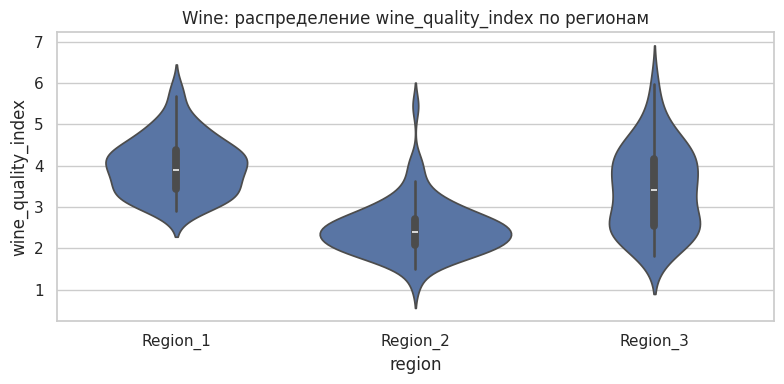

Коэффициент разделения классов (больше = лучше):


,flavanoids,color_intensity,wine_quality_index
Пара,,,
Region_1 vs Region_2,0.817,1.129,1.124
Region_1 vs Region_3,3.185,0.526,0.339
Region_2 vs Region_3,1.300,1.332,0.568
AVG,1.768,0.996,0.677


In [6]:
df["wine_quality_index"] = 0.6 * df["flavanoids"] + 0.4 * df["color_intensity"]

# 1) График распределения индекса по регионам
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x="region", y="wine_quality_index")
plt.title("Wine: распределение wine_quality_index по регионам")
plt.tight_layout()
plt.show()

# 2) Коэффициент разделения классов для каждой пары регионов
regions = ["Region_1", "Region_2", "Region_3"]
pairs = [("Region_1", "Region_2"), ("Region_1", "Region_3"), ("Region_2", "Region_3")]

def separation(series, a, b):
    """abs(mean_a - mean_b) / (std_a + std_b)"""
    sa = series[df["region"] == a]
    sb = series[df["region"] == b]
    return abs(sa.mean() - sb.mean()) / (sa.std(ddof=1) + sb.std(ddof=1))

def separation_table(feature_name):
    series = df[feature_name]
    rows = []
    for a, b in pairs:
        rows.append({
            "Пара": f"{a} vs {b}",
            feature_name: separation(series, a, b)
        })
    return pd.DataFrame(rows).set_index("Пара")

# Сравним индекс с исходными признаками, из которых он собран
tbl = separation_table("flavanoids").join(
    separation_table("color_intensity")
).join(
    separation_table("wine_quality_index")
)

tbl.loc["AVG"] = tbl.mean(axis=0)

print("Коэффициент разделения классов (больше = лучше):")
display(tbl.round(3))


### Интерпретация задания 3
- Если `wine_quality_index` даёт **больший** коэффициент разделения (по большинству пар или в среднем), значит комбинация улучшила разделимость.
- Если коэффициент стал меньше — значит смесь “размыла” сигнал, и исходные признаки по отдельности полезнее.


# Выводы
Датасет Wine содержит 13 химических признаков и 3 класса регионов, при этом классы заметно пересекаются по многим отдельным признакам.
Корреляционный анализ показывает, что часть признаков сильно связана между собой (мультиколлинеарность), что важно учитывать при построении линейных моделей и интерпретации коэффициентов.
Асимметрия распределений у некоторых признаков указывает на правые “хвосты” и возможную необходимость преобразований (лог/PowerTransform) и масштабирования перед методами, чувствительными к распределению.
Линейная комбинация признаков не гарантирует улучшения разделимости: это нужно проверять графиками и численной метрикой разделения.
